In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import os
from tpot import TPOTRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import *
from sklearn.svm import *
import re

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('../raw_data/data_final_indé_medium2.csv')

In [4]:
data

,steam_appid,name_x,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,name_y,developer,publisher,platforms,english,price,days_on_steam,is_a_remake,has_a_website,score_descriptif,ratio,nb_review,nb_game_by_publisher,nb_game_by_dev,followers,owner_estimated
0,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,Land It!,Nemesys Games,Nemesys Games,windows;mac,1,6.99,1003.0,1,0,2,0.909091,11,1,1,138,4135.0
1,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,BIT.TRIP FLUX,Gaijin Games,Gaijin Games,windows;mac,1,6.99,1791.0,1,1,5,0.533835,133,3,3,166,50000.0
2,222180,Mushroom Men: Truffle Trouble,action platformer puzzle_platformer puzzle 3d_...,0.448947,0.016124,0.260814,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,Mushroom Men: Truffle Trouble,Red Fly Studio,Red Fly Studio,windows,1,1.99,1513.0,1,0,7,0.700000,30,2,1,376,11278.0
3,222500,Rail Adventures - VR Tech Demo,free_to_play action racing vr puzzle_platformer,0.466452,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.247480,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,Rail Adventures - VR Tech Demo,exosyphen studios,exosyphen studios,windows,1,0.00,979.0,1,1,4,0.484848,33,4,4,324,12406.0
4,229560,Hacker Evolution IMMERSION,simulation early_access action hacking relaxing,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.678023,0.016946,Hacker Evolution IMMERSION,exosyphen studios,exosyphen studios,windows;mac;linux,1,14.99,1006.0,1,1,3,0.578947,38,4,4,0,14286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11459,1048640,At Home,adventure action stealth replay_value psycholo...,0.223394,0.016550,0.016550,0.016550,0.260176,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.235076,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,At Home,BisquitPlay,BisquitPlay,windows,1,3.99,35.0,1,0,4,0.250000,12,1,1,105,4511.0
11460,1049230,Gray Memory,adventure 1980s relaxing realistic real_time_w...,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.704628,Gray Memory,Sole,Sole,windows,1,2.09,34.0,1,0,4,0.500000,2,1,1,9,752.0
11461,1049840,Haramatia,rpg early_access action adventure massively_mu...,0.016079,0.016079,0.016079,0.016079,0.016079,0.418829,0.016079,0.016079,0.016079,0.291743,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,Haramatia,Salavat Kasimov,Sevite byte studio,windows,1,2.79,35.0,1,0,2,0.500000,2,1,1,131,752.0
11462,1049930,Frank and 10 roots,3d_platformer difficult platformer singleplaye...,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.700849,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,Frank and 10 roots,Horrendous Games,Horrendous Games,windows,1,2.89,32.0,1,1,1,1.000000,1,2,2,18,376.0


In [5]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['platforms']])
platform_encoded = ohe.transform(data[['platforms']])
df1 = pd.DataFrame(platform_encoded)
data = data.join(df1)

In [6]:
#data.name = data.name.str.replace(r'[^\x00-\x7F]+', 'Nan')
#data = data[data.name != 'Nan']

In [7]:
#test = data[data['steam_appid'] == 348570]
#test = test.drop(columns=['steam_appid', 'top_5_tags', 'owner_estimated','name', 'nb_review', 'sells_per_days', 'platforms', 'ratio', 'is_a_remake', 'topic_10'])

In [21]:
X = data.drop(columns=['steam_appid', "name_x", 'top_5_tags', 'name_y', 'publisher', 'developer', 'nb_review', 'platforms', 'ratio', 'owner_estimated' ])
y = data['owner_estimated']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# RandomForestRegressor

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)
model = forest

model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.4, min_samples_leaf=14,
                      min_samples_split=14)

In [27]:
cv_results = cross_validate(model, X_test, y_test, cv=20)

In [28]:
cv_results['test_score']


array([0.52556601, 0.48883178, 0.28651711, 0.4322306 , 0.49046875,
       0.36817139, 0.45595207, 0.38506335, 0.41076556, 0.40921187,
       0.37879208, 0.27645883, 0.39278744, 0.52344039, 0.45693694,
       0.31020884, 0.49529857, 0.55204637, 0.39402889, 0.42621851])

In [29]:
cv_results['test_score'].mean()

0.4229497665982648

(array([780., 745., 556., 416., 316., 242., 166., 135.,  62.,  22.]),
 array([  872.01139029,  3412.31618223,  5952.62097416,  8492.92576609,
        11033.23055803, 13573.53534996, 16113.84014189, 18654.14493383,
        21194.44972576, 23734.75451769, 26275.05930963]),
 <BarContainer object of 10 artists>)

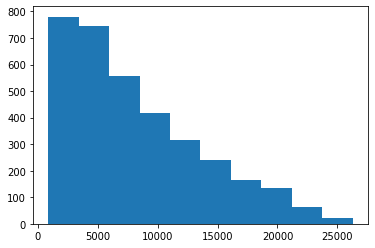

In [30]:
plt.hist(model.predict(X_test))

(array([1899.,  644.,  348.,  183.,  135.,   91.,   51.,   30.,   31.,
          28.]),
 array([  376. ,  5338.4, 10300.8, 15263.2, 20225.6, 25188. , 30150.4,
        35112.8, 40075.2, 45037.6, 50000. ]),
 <BarContainer object of 10 artists>)

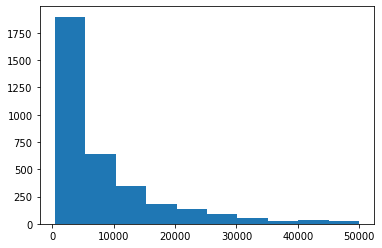

In [18]:
plt.hist(y_test)

In [19]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+10, tolerance: 6.955e+07
  model = cd_fast.enet_coordinate_descent(


,coef_ridge,coef_lasso
topic_0,722,727
topic_1,44,48
topic_2,-14,-9
topic_3,443,447
topic_4,514,518
topic_5,-92,-86
topic_6,277,280
topic_7,334,337
topic_8,-329,-324
topic_9,386,391


In [20]:
model.predict(test)

NameError: name 'test' is not defined